In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
genre_names = ['blues', 'classical', 'country', 'disco', 'hipop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
# Dataset import
data = pd.read_csv('./mfcc_dataset.csv')

In [4]:
data.describe()

,Unnamed: 0,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,MFCC_10,MFCC_11,MFCC_12,MFCC_13,MFCC_DELTA1_1,MFCC_DELTA1_2,MFCC_DELTA1_3,MFCC_DELTA1_4,MFCC_DELTA1_5,MFCC_DELTA1_6,MFCC_DELTA1_7,MFCC_DELTA1_8,MFCC_DELTA1_9,MFCC_DELTA1_10,MFCC_DELTA1_11,MFCC_DELTA1_12,MFCC_DELTA1_13,MFCC_DELTA2_1,MFCC_DELTA2_2,MFCC_DELTA2_3,MFCC_DELTA2_4,MFCC_DELTA2_5,MFCC_DELTA2_6,MFCC_DELTA2_7,MFCC_DELTA2_8,MFCC_DELTA2_9,MFCC_DELTA2_10,MFCC_DELTA2_11,MFCC_DELTA2_12,MFCC_DELTA2_13,CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,879.252321,97.858783,-8.685815,36.782141,-1.525103,14.960672,-5.158626,9.656878,-7.179920,7.660316,-6.439969,4.485507,-4.820448,0.537088,-0.068632,-0.028214,-0.010131,0.009936,-0.041115,-0.112050,-0.041420,-0.036036,-0.004702,0.046743,0.012285,-0.024188,-0.227198,0.132583,0.033312,-0.011284,0.049916,-0.000912,0.045831,0.014128,0.024640,0.012339,0.070742,0.021311,0.012735,4.500000
std,288.819436,117.252755,42.266393,31.353996,22.120095,18.039387,15.823860,14.648571,14.098369,12.893309,12.033693,11.230810,10.482193,10.374141,10.197056,4.267691,3.336513,2.289406,1.974173,1.811139,1.775137,1.489150,1.456981,1.420210,1.361547,1.292360,1.314510,6.565486,2.799610,2.081809,1.410130,1.274020,1.123124,1.039998,0.988856,0.939347,0.899741,0.874838,0.813371,0.840538,2.873719
min,0.000000,430.841833,-74.133509,-101.488014,-58.232264,-58.022048,-63.104731,-66.987763,-36.102765,-54.478099,-31.799202,-51.732782,-28.377343,-36.458499,-30.227954,-14.287781,-13.421577,-8.739666,-8.921088,-7.979810,-6.463821,-5.810496,-5.278170,-5.632333,-5.891252,-5.358355,-4.828334,-27.399427,-10.900145,-9.365753,-7.701660,-4.873264,-4.335189,-4.806448,-3.416269,-3.977834,-3.906678,-3.637181,-3.603310,-3.298601,0.000000
25%,249.750000,809.661649,71.105591,-30.968071,22.510153,-13.170603,4.478234,-14.927740,0.319443,-16.305419,-0.809134,-14.000097,-2.538334,-11.902627,-4.867692,-2.289887,-1.870732,-1.323463,-1.086689,-1.036091,-1.180656,-1.010098,-0.869562,-0.844722,-0.782568,-0.715365,-0.796604,-3.155856,-1.236035,-1.009007,-0.764689,-0.661259,-0.614368,-0.557659,-0.577595,-0.531124,-0.507811,-0.453861,-0.461584,-0.477028,2.000000
50%,499.500000,902.258178,97.048615,-10.818550,36.979028,-1.192478,15.213596,-5.226938,10.137175,-7.227399,7.360368,-6.555154,4.961665,-5.236113,-0.430483,0.000903,-0.104948,-0.020657,-0.020905,0.031399,-0.041272,-0.084390,0.001280,-0.069269,0.007010,0.042905,-0.014843,0.032344,0.004710,0.105900,-0.036952,0.015943,0.030174,0.021779,-0.003809,0.000457,0.015995,0.068621,0.035873,0.015991,4.500000
75%,749.250000,963.974410,127.545930,11.617730,51.797165,10.953003,26.202785,4.444511,20.051826,1.910470,16.417715,1.290177,12.001385,1.478807,4.955870,2.190742,1.905937,1.326083,1.175785,1.025118,0.960751,0.860647,0.787892,0.894294,0.851304,0.734764,0.760417,2.905250,1.258883,1.124244,0.743482,0.681869,0.616124,0.592000,0.587589,0.596593,0.534770,0.606486,0.507567,0.509141,7.000000
max,999.000000,1155.952301,207.148612,110.286990,104.002513,62.565272,62.048394,48.410194,53.972106,45.552812,41.241153,32.928588,35.279346,36.727474,47.139299,20.452326,12.775497,9.091882,9.446856,6.269918,5.982108,7.368536,7.935235,4.702505,6.344409,6.727245,4.938635,41.702598,15.407706,8.511354,5.851080,6.270564,5.859800,4.238766,4.211852,4.128991,3.565998,3.788171,4.626564,3.228347,9.000000


In [5]:
A = data.to_numpy()[:, 1:-1]

A_mean = np.mean(A, axis=0)

A_norm = A - A_mean[None, :]

In [6]:
U, s, VT = np.linalg.svd(A_norm, full_matrices=False)

Text(0.5, 1.0, 'Explained Variance')

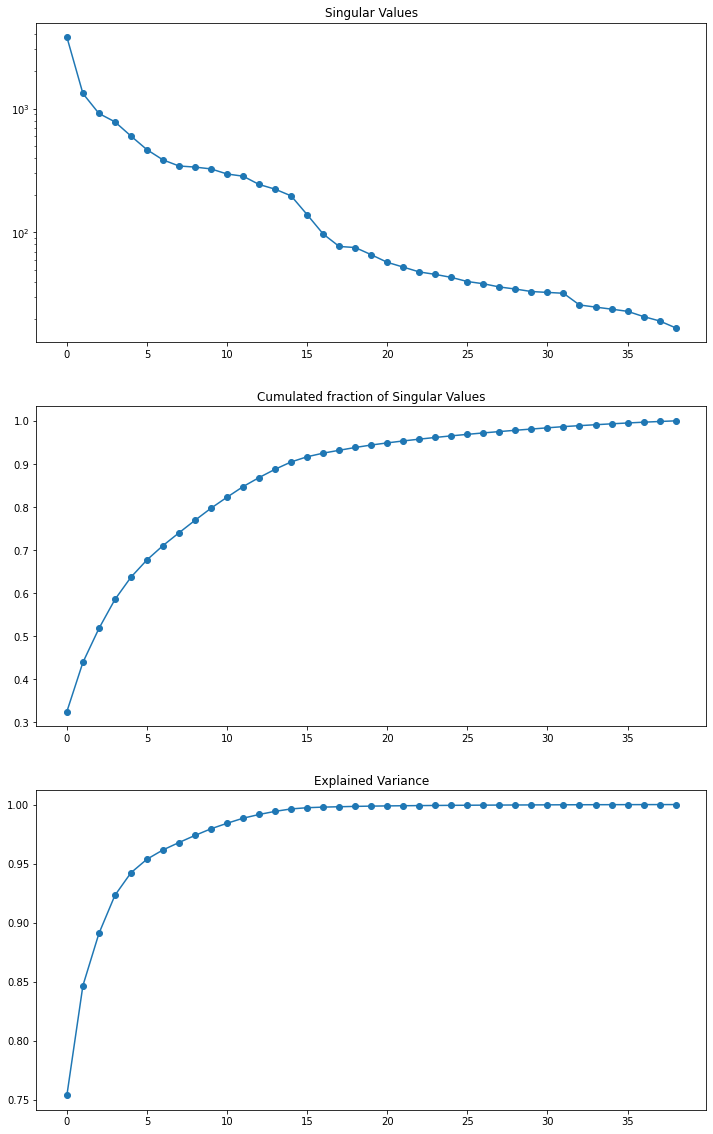

In [7]:
fig, axs = plt.subplots(3, 1, figsize=(12,20))

axs[0].semilogy(s, 'o-')
axs[0].set_title('Singular Values')

axs[1].plot(np.cumsum(s) / np.sum(s), 'o-')
axs[1].set_title('Cumulated fraction of Singular Values')


axs[2].plot(np.cumsum(s**2) / np.sum(s**2), 'o-')
axs[2].set_title('Explained Variance')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

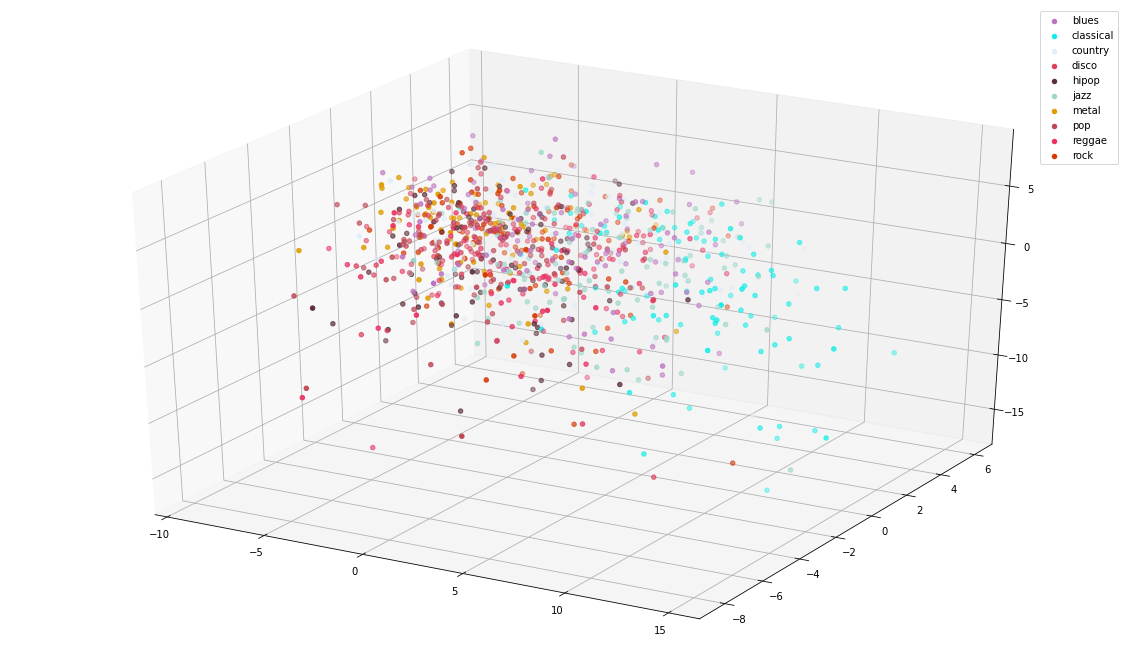

In [8]:
Phi = U @ A_norm.T

fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(projection='3d')

for genre_index in range(10):
  color_rgb = np.random.rand(3,)
  principal_components = Phi[100*genre_index:100*(genre_index + 1), :]
  ax.scatter(principal_components[:,0], principal_components[:,1], principal_components[:,2], label = genre_names[genre_index], c=color_rgb, s = 20)

ax.legend()

# Nearest Centroid Classification

In [19]:
# Separation between test set and training set
dataset_size = Phi.shape[0]
training_count = int(dataset_size * 0.8)


indices = list(range(dataset_size))
np.random.shuffle(indices)

training_indices = indices[0:training_count]
test_indices = indices[training_count:]


# Training Set
training_set = Phi[training_indices, :10]
# Training Set labels
training_set_labels = data.to_numpy()[training_indices, -1].astype(int)


# Test Set
test_set = Phi[training_indices, :10]
# Test Set labels
test_set_labels = data.to_numpy()[training_indices, -1].astype(int)

# Centroid computation
centroids = list()
for class_index in range(10):
  # partial_set only contains the sample of a certain class
  partial_set = training_set[training_set_labels == class_index,:]
  # class_centroid contains the mean for each feature
  class_centroid = partial_set.mean(axis=0)
  centroids.append(class_centroid)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

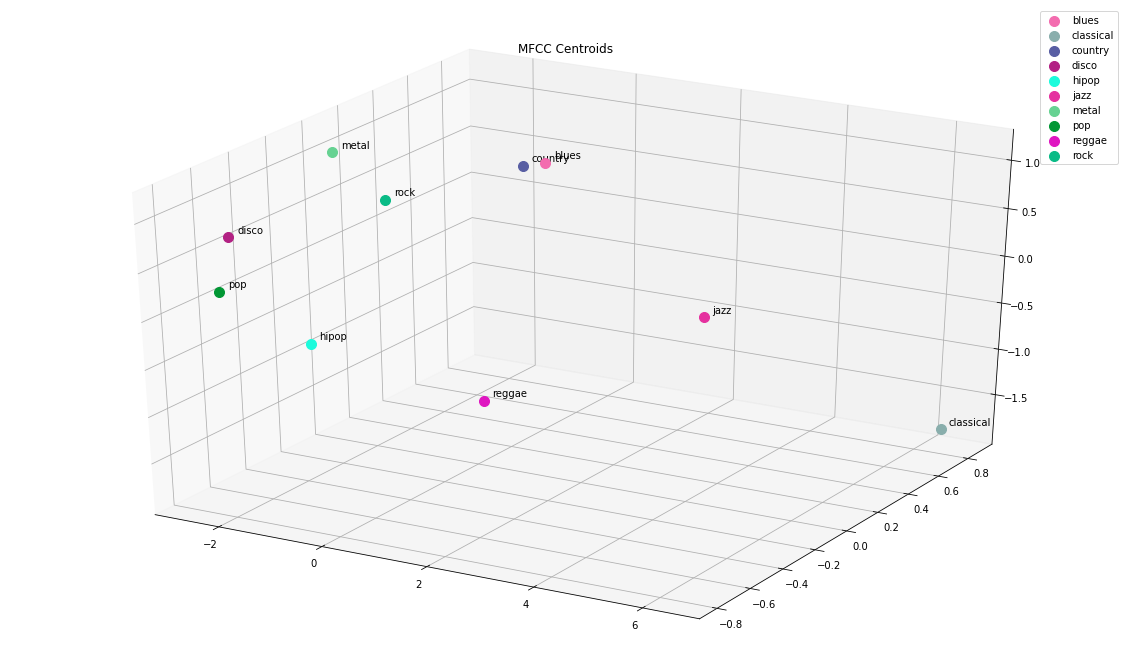

In [20]:
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(projection='3d')

text_offset = 0.05

for genre_index in range(10):
  color_rgb = np.random.rand(3,)
  centroid = centroids[genre_index]
  ax.scatter(centroid[0], centroid[1], centroid[2], label = genre_names[genre_index], c=color_rgb, s = 100)
  ax.text(centroid[0], centroid[1] + text_offset, centroid[2], genre_names[genre_index])

ax.set_title('MFCC Centroids')
ax.legend()

In [21]:
# Input format
def classify(input, genres_to_classify=genre_names, distance=np.linalg.norm, debug_mode=False):
  min_distance = np.infty
  current_closest = ''
  for i, genre in enumerate(genre_names):
    if not genre in genres_to_classify:
      continue

    current_centroid = centroids[i]
    buffer = distance(input - current_centroid)
    if buffer < min_distance:
      min_distance = buffer
      current_closest = genre

    if debug_mode : print('Sample distance from ' + genre + ' is ' + str(buffer))

  return current_closest

In [22]:
confusion_matrix = np.zeros((10, 10))

# Size of the test set
test_count = test_set.shape[0]

# For each test sample
for test_index in range(test_count):
  # True label (index form)
  true_class_index = test_set_labels[test_index]
  # True label (string form)
  true_class = genre_names[true_class_index]

  # Predict
  input_vector = test_set[test_index,:]
  predicted = classify(input_vector, debug_mode = False)

  # Prediction (index form)
  predicted_index = genre_names.index(predicted)

  # Add result to confusion matrix
  confusion_matrix[true_class_index, predicted_index] += 1

In [23]:
print(confusion_matrix)
accuracy = confusion_matrix.trace() / confusion_matrix.sum()
print('Accuracy is %1.2f%%' % (accuracy * 100.0))

[[12. 11.  3.  1.  1. 14. 23.  2.  3. 10.]
 [ 1. 56.  8.  3.  0. 16.  0.  0.  0.  1.]
 [ 5. 11.  7.  3.  4. 15. 15. 14.  4.  7.]
 [ 7.  4.  1.  8.  5.  4. 18. 21.  3.  6.]
 [ 2.  2.  2.  5.  2.  8. 18. 24. 11.  4.]
 [12. 21.  2.  0.  0. 20.  2.  9.  9.  2.]
 [ 4.  3.  0.  1.  6.  2. 62.  2.  4.  2.]
 [ 2.  2.  2.  2.  3.  5.  2. 49.  5.  2.]
 [ 5.  8.  4.  1.  3. 18.  7. 18. 14.  3.]
 [ 8.  7.  4.  1.  4. 10. 24. 13.  1.  5.]]
Accuracy is 29.38%


6 genres

In [24]:
input_genres = ['blues', 'classical', 'country', 'disco', 'pop', 'rock']

# Number of genres to classify
genre_count = len(input_genres)

# Indices of genres to classify
genre_indices = list()
for genre_n in input_genres: genre_indices.append(genre_names.index(genre_n))

# Confusion matrix init
confusion_matrix = np.zeros((genre_count,genre_count))

# Filter to only select samples from the input genres
test_set_filter = np.zeros(test_set.shape[0], dtype='bool')
for j in range(test_set.shape[0]):
  test_set_filter[j] = test_set_labels[j] in genre_indices

# Application of filter on the test set
partial_test_set = test_set[test_set_filter,:]
partial_test_labels = test_set_labels[test_set_filter]
partial_test_count = partial_test_set.shape[0]

# For each sample of the partial test set
for test_index in range(partial_test_count):
  true_class_index = partial_test_labels[test_index]
  true_class = genre_names[true_class_index]

  # Predict
  input_vector = partial_test_set[test_index,:]
  predicted = classify(input_vector, genres_to_classify = input_genres)

  # Prediction (index form)
  predicted_index = input_genres.index(predicted)

  # Add result to confusion matrix
  confusion_matrix[genre_indices.index(true_class_index), predicted_index] += 1

In [25]:
print(confusion_matrix)

[[20. 16.  8. 14.  5. 17.]
 [ 8. 65.  8.  3.  0.  1.]
 [ 9. 17. 14. 14. 18. 13.]
 [10.  4.  4. 19. 27. 13.]
 [ 2.  4.  8.  6. 52.  2.]
 [10. 11.  9. 19. 16. 12.]]


In [26]:
accuracy = confusion_matrix.trace() / confusion_matrix.sum()
print('Accuracy is %1.2f%%' % (accuracy * 100.0))

Accuracy is 38.08%


2 genres

In [27]:
input_genres = ['classical', 'pop']

# Number of genres to classify
genre_count = len(input_genres)

# Indices of genres to classify
genre_indices = list()
for genre_n in input_genres: genre_indices.append(genre_names.index(genre_n))

# Confusion matrix init
confusion_matrix = np.zeros((genre_count,genre_count))

# Filter to only select samples from the input genres
test_set_filter = np.zeros(test_set.shape[0], dtype='bool')
for j in range(test_set.shape[0]):
  test_set_filter[j] = test_set_labels[j] in genre_indices

# Application of filter on the test set
partial_test_set = test_set[test_set_filter,:]
partial_test_labels = test_set_labels[test_set_filter]
partial_test_count = partial_test_set.shape[0]

# For each sample of the partial test set
for test_index in range(partial_test_count):
  true_class_index = partial_test_labels[test_index]
  true_class = genre_names[true_class_index]

  # Predict
  input_vector = partial_test_set[test_index,:]
  predicted = classify(input_vector, genres_to_classify = input_genres)

  # Prediction (index form)
  predicted_index = input_genres.index(predicted)

  # Add result to confusion matrix
  confusion_matrix[genre_indices.index(true_class_index), predicted_index] += 1

In [28]:
print(confusion_matrix)

[[75. 10.]
 [ 8. 66.]]


In [29]:
accuracy = confusion_matrix.trace() / confusion_matrix.sum()
print('Accuracy is %1.2f%%' % (accuracy * 100.0))

Accuracy is 88.68%


# k-Nearest Neighbours

In [30]:
def kNN(input, genres_to_classify=genre_names, k=1, distance= np.linalg.norm):
  #Inizialization:
  ##min_dist: this numpy array contains the minimum distances found in the program in increasing order
  ##class_dist: this numpy array contains the class associated to the distances saved in min_dist
  ##class_counter: this numpy array will be used at the end of the code to count how many times a genres is found between the minimum distances
  min_dist = np.array([2125262800.0 for i in range(k)])
  class_dist = np.array([-1.0 for i in range(k)])
  class_counter = np.array([0.0 for i in range(10)])

  #Iterating on the genres gave as input
  for genre_name in genres_to_classify:
    #Keeping the number value of the genre currently considered
    class_curr= genre_names.index(genre_name)

    #Here we extract the features of the training set that belong to the genre previously calculated
    #(the field class is then removed)
    analizying_data = training_set[training_set_labels == class_curr,:]

    #Iterating on the data of the training set of the genre considered
    for i in range(analizying_data.shape[0]):
      #Calculating the distance of the training set's data from the input.
      curr_dist = distance(input - analizying_data[i, :])

      #If the distance found is minor than the maximum distance stored, it should be inserted in the min_dist array
      if curr_dist < np.max(min_dist):
        #Ranging inside the min_dist array to inserted the value
        for j in range(k):
          #If a value bigger than the distance currently considered is found, it means that the distance must go before that value.
          if min_dist[j]>curr_dist:
            #Inserting the value in the right place and cutting the min_dist array.
            min_dist= np.insert(min_dist, j, curr_dist) 
            class_dist= np.insert(class_dist, j, class_curr)
            min_dist= min_dist[0:k]
            class_dist=class_dist[0:k]
            break
            
  #If the k distances that we have to store are more than one we should count the genres found, otherwise the result is immediately
  #calculated
  if k>1:
    result_counter=0
    last_found=np.array([])

    #Iterating on the class_dist array
    for i in range(k):
      #For each saved genre of class_dist array the class counter is incremented
      class_counter[class_dist[i].astype(int)] = class_counter[class_dist[i].astype(int)] + 1

    #Iterating on class_counter
    for i in range(10):
      #This control is needed to check if there are more classes with the same number of nearest points
      if (class_counter[i]==np.max(class_counter)):
        result_counter +=1
        last_found= np.append(last_found, i)
    
    #If more genres have the same number of nearest points, the nearest genre is considered, else the genre with maximum number of near 
    #points is returned
    if result_counter>1:
      #Iterating on class_dist
      for ii in range(k):
        #Iterating on last_found
        for jj in range(last_found.size):
          #First nearest genre found
          if last_found[jj] == class_dist[ii]:
            return genre_names[class_dist[ii].astype(int)]
    else:
      return genre_names[last_found[0].astype(int)]

  else:
    return genre_names[int(class_dist)]

# **Confusion matrix: 2 genres, Euclidean distance**

In [31]:
#Inizialization
confusion_matrix = np.zeros((10, 10))
k_tested = np.array([1, 3, 5, 7, 9])
genres_tested = ['classical', 'pop']

genre_indices = list()

#Extrancting the indices of the genres presented
for genre_n in genres_tested: 
  genre_indices.append(genre_names.index(genre_n))

#Creating a mask that extracts the features of the validation set with the genres wanted
test_set_filter = np.zeros(test_set.shape[0], dtype='bool')
for j in range(test_set.shape[0]): 
  test_set_filter[j] = test_set_labels[j] in genre_indices

validation_data_filtered = test_set[test_set_filter, :]
validation_labels_filtered = test_set_labels[test_set_filter]

#Iterating on the ks
for k_curr in k_tested:
  print("Printing confusion matrix for {} ks and 2 genres".format(k_curr))

  #Iterating on the validation data extracted
  for i in range(validation_data_filtered.shape[0]):
    #True genre of the value
    current_class = validation_labels_filtered[i]

    #Predicted genre of the value in text form
    predicted_class = kNN(validation_data_filtered[i, :], genres_to_classify=genres_tested, k=k_curr)

    #Updating the confusion matrix
    confusion_matrix[int(current_class), genre_names.index(predicted_class)] = confusion_matrix[int(current_class), genre_names.index(predicted_class)] + 1

  #Printing the confusion matrix found for this case and the accuracy calculated
  print(confusion_matrix)
  print("Accurancy {}".format(confusion_matrix.trace()/confusion_matrix.sum()))
  print()

  #Reinitialization
  confusion_matrix = np.zeros((10, 10))

Printing confusion matrix for 1 ks and 2 genres
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 85.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 74.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
Accurancy 1.0

Printing confusion matrix for 3 ks and 2 genres
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 84.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  7.  0.  0.  0.  0.  0. 67.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
Accurancy 0.949685534591195

# **Confusion matrix: 6 genres, Euclidean distance**

In [32]:
#Inizialization
confusion_matrix = np.zeros((10, 10))
k_tested = np.array([1, 3, 5, 7, 9])
genres_tested = ['blues', 'classical', 'country', 'disco', 'pop', 'rock']

genre_indices = list()

#Extrancting the indices of the genres presented
for genre_n in genres_tested: 
  genre_indices.append(genre_names.index(genre_n))

#Creating a mask that extracts the features of the validation set with the genres wanted
test_set_filter = np.zeros(test_set.shape[0], dtype='bool')
for j in range(test_set.shape[0]): 
  test_set_filter[j] = test_set_labels[j] in genre_indices

validation_data_filtered = test_set[test_set_filter, :]
validation_labels_filtered = test_set_labels[test_set_filter]

#Iterating on the ks
for k_curr in k_tested:
  print("Printing confusion matrix for {} k and 6 genres".format(k_curr))

  #Iterating on the validation data extracted
  for i in range(validation_data_filtered.shape[0]):
    #True genre of the value
    current_class = validation_labels_filtered[i]

    #Predicted genre of the value in text form
    predicted_class = kNN(validation_data_filtered[i, :], genres_to_classify=genres_tested, k=k_curr)

    #Updating the confusion matrix
    confusion_matrix[int(current_class), genre_names.index(predicted_class)] = confusion_matrix[int(current_class), genre_names.index(predicted_class)] + 1

  #Printing the confusion matrix found for this case and the accuracy calculated
  print(confusion_matrix)
  print("Accurancy {}".format(confusion_matrix.trace()/confusion_matrix.sum()))
  print()

  #Reinitialization
  confusion_matrix = np.zeros((10, 10))

Printing confusion matrix for 1 k and 6 genres
[[80.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 85.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 85.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 77.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 74.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 77.]]
Accurancy 1.0

Printing confusion matrix for 3 k and 6 genres
[[68.  2.  4.  1.  0.  0.  0.  0.  0.  5.]
 [ 0. 82.  1.  1.  0.  0.  0.  0.  0.  1.]
 [ 5.  3. 70.  2.  0.  0.  0.  2.  0.  3.]
 [ 4.  1.  6. 59.  0.  0.  0.  2.  0.  5.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  3.  3.  0.  0.  0. 64.  0.  2.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 2.  2.  3.  4.  0.  0.  0.  2.  0. 64.]]
Accurancy 0.8514644351464435


# **Confusion matrix: 10 genres, Euclidean distance**

In [33]:
#Inizialization
confusion_matrix = np.zeros((10, 10))
k_tested = np.array([1, 3, 5, 7, 9])
genres_tested = genre_names

genre_indices = list()

#Extrancting the indices of the genres presented
for genre_n in genres_tested: 
  genre_indices.append(genre_names.index(genre_n))

#Creating a mask that extracts the features of the validation set with the genres wanted
test_set_filter = np.zeros(test_set.shape[0], dtype='bool')
for j in range(test_set.shape[0]): 
  test_set_filter[j] = test_set_labels[j] in genre_indices

validation_data_filtered = test_set[test_set_filter, :]
validation_labels_filtered = test_set_labels[test_set_filter]

#Iterating on the ks
for k_curr in k_tested:
  print("Printing confusion matrix for {} k and 10 genres".format(k_curr))

  #Iterating on the validation data extracted
  for i in range(validation_data_filtered.shape[0]):
    #True genre of the value
    current_class = validation_labels_filtered[i]

    #Predicted genre of the value in text form
    predicted_class = kNN(validation_data_filtered[i], genres_to_classify=genres_tested, k=k_curr)

    #Updating the confusion matrix
    confusion_matrix[int(current_class), genre_names.index(predicted_class)] = confusion_matrix[int(current_class), genre_names.index(predicted_class)] + 1

  #Printing the confusion matrix found for this case and the accuracy calculated
  print(confusion_matrix)
  print("Accurancy {}".format(confusion_matrix.trace()/confusion_matrix.sum()))
  print()

  #Reinitialization
  confusion_matrix = np.zeros((10, 10))

Printing confusion matrix for 1 k and 10 genres
[[80.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 85.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 85.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 77.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 78.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 77.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. 86.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 74.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 81.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 77.]]
Accurancy 1.0

Printing confusion matrix for 3 k and 10 genres
[[69.  0.  0.  1.  0.  2.  6.  0.  0.  2.]
 [ 0. 80.  1.  1.  0.  2.  0.  0.  0.  1.]
 [ 1.  3. 79.  0.  0.  1.  0.  0.  1.  0.]
 [ 2.  1.  4. 60.  0.  3.  4.  1.  0.  2.]
 [ 0.  0.  0.  0. 68.  3.  5.  1.  0.  1.]
 [ 1.  6.  1.  0.  0. 64.  1.  0.  2.  2.]
 [ 0.  1.  1.  0.  1.  0. 81.  0.  1.  1.]
 [ 1.  0.  3.  0.  1.  0.  2. 66.  0.  1.]
 [ 0.  0.  2.  1.  2.  1.  0.  1. 72.  2.]
 [ 0.  0.  0.  4.  1.  2.  4.  1.  0. 65.]]
Accurancy 0.88

Printing co

# Multiclass Support Vector Machines - OneToOne

In [41]:
from abc import abstractmethod

class SVMClassifier_OTO:
  def __init__(self, genre1, genre2):
    self.genre1 = genre1 # Corresponds to SVM label 1
    self.genre2 = genre2 # Corresponds to SVM label -1

  @abstractmethod
  def bin_classify(self, input):
    pass

  @abstractmethod
  def train(self, x, y):
    pass


In [51]:
import numpy as np

genre_names = ['blues', 'classical', 'country', 'disco', 'hipop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


class PrimalLinearClassifier(SVMClassifier_OTO):
  def __init__(self, genre1, genre2):
    super().__init__(genre1, genre2)
    self.w = np.random.randn(10)
    self.b = 0
    self.learning_rate = 0.02
    self.num_epochs = 200

  def bin_classify(self, input):
    return self.genre1 if self.internal_classify(input) >= 0 else self.genre2

  def train(self, x, y):
    class1_data = x[y == genre_names.index(self.genre1)]
    class2_data = x[y == genre_names.index(self.genre2)]

    total_samples_count = x.shape[0]

    class1_samples_count = class1_data.shape[0]
    class2_samples_count = class2_data.shape[0]

    for epoch in range(self.num_epochs):
      gradient_w = np.zeros(self.w.size)
      gradient_b = 0

      for sample_index in range(class1_samples_count):
        gradient_w += self.hinge_derivative_w(class1_data[sample_index, :], 1)
        gradient_b += self.hinge_derivative_b(class1_data[sample_index, :], 1)

      for sample_index in range(class2_samples_count):
        gradient_w += self.hinge_derivative_w(class2_data[sample_index, :], -1)
        gradient_b += self.hinge_derivative_b(class2_data[sample_index, :], -1)

      gradient_w /= total_samples_count
      gradient_b /= total_samples_count

      self.w -= self.learning_rate * gradient_w
      self.b -= self.learning_rate * gradient_b

    confusion_mat = np.zeros((2, 2))

    for test_index in range(class1_samples_count):
      predicted = 0 if self.internal_classify(class1_data[test_index, :]) >= 0 else 1
      confusion_mat[0, predicted] += 1

    for test_index in range(class2_samples_count):
      predicted = 0 if self.internal_classify(class2_data[test_index, :]) >= 0 else 1
      confusion_mat[1, predicted] += 1

    print() # Newline
    print(" - Accuracy: " + str(confusion_mat.trace() / np.sum(confusion_mat)))
    print()  # Newline

  def set_learning_rate(self, val):
    self.learning_rate = val

  def set_num_epochs(self, val):
    self.num_epochs = val

  # Utils
  def internal_classify(self, x):
    return np.dot(self.w, x) - self.b

  def hingeloss(self, x, y):
    prod = y * self.internal_classify(x)

    if prod >= 1:
      return 0
    else:
      return 1 - prod

  def hinge_derivative_w(self, x, y):
    prod = y * self.internal_classify(x)
    prod_elem = y * x
    if prod >= 1:
      return np.zeros(x.shape[0])
    else:
      return -prod_elem

  def hinge_derivative_b(self, x, y):
    prod = y * self.internal_classify(x)
    if prod >= 1:
      return 0
    else:
      return y

In [52]:
class DBT_Node:
    def __init__(self, genre1, genre2, classifier):
        self.genre1 = genre1
        self.genre2 = genre2
        self.classifier = classifier

        self.left_child = None
        self.right_child = None

    def is_leaf(self):
        return self.left_child is None and self.right_child is None

    def classify(self, input):
        pred_genre = self.classifier.bin_classify(input)

        if self.is_leaf():
            return pred_genre
        else:
            if pred_genre == self.genre1:
                return self.left_child.classify(input)
            else:
                return self.right_child.classify(input)


class DecisionBinaryTree:
    def __init__(self, genres, genre_classifiers):
        curr_classifier = DecisionBinaryTree.find_classifier(genres[0], genres[1], genre_classifiers)

        self.root = DBT_Node(genres[0], genres[1], curr_classifier)

        self.build_tree(genres, genre_classifiers, self.root)

    def classify(self, input):
        return self.root.classify(input)

    def print_tree(self):
        DecisionBinaryTree.print_tree_util(self.root, 0)

    # Utils
    """
    Recursively constructs the binary decision tree
    """

    def build_tree(self, genres, genre_classifiers, root):
        if len(genres) == 2:
            return

        # Remove the genre that has already been discarded if the left choice is made
        left_genres = genres.copy()
        left_genres.remove(root.genre2)
        # Remove its classifiers
        left_classifiers = DecisionBinaryTree.find_all_classifiers_except(root.genre2, genre_classifiers)

        # Find the classifier for the left child and create the node
        curr_classifier = DecisionBinaryTree.find_classifier(root.genre1, left_genres[1], genre_classifiers)
        root.left_child = DBT_Node(root.genre1, left_genres[1], curr_classifier)

        # Continue building the tree with the left child
        self.build_tree(left_genres, left_classifiers, root.left_child)

        # Remove the genre that has already been discarded if the left choice is made
        right_genres = genres.copy()
        right_genres.remove(root.genre1)
        # Remove its classifiers
        right_classifiers = DecisionBinaryTree.find_all_classifiers_except(root.genre1, genre_classifiers)

        # Find the classifier for the left child and create the node
        curr_classifier = DecisionBinaryTree.find_classifier(root.genre2, right_genres[1], genre_classifiers)
        root.right_child = DBT_Node(root.genre2, right_genres[1], curr_classifier)

        # Continue building the tree with the left child
        self.build_tree(right_genres, right_classifiers, root.right_child)

    """
    Prints a binary tree vertically
    """

    @staticmethod
    def print_tree_util(root, space):

        # Base case
        if (root == None):
            return

        # Increase distance between levels
        space += 5

        # Process right child first
        DecisionBinaryTree.print_tree_util(root.right_child, space)

        # Print current node after space
        # count
        print()
        for i in range(5, space):
            print(end=" ")
        print("(" + root.genre1 + " / " + root.genre2 + ")")

        # Process left child
        DecisionBinaryTree.print_tree_util(root.left_child, space)

    """
    Finds the binary classifier between gen_a and gen_b
    """

    @staticmethod
    def find_classifier(gen_a, gen_b, classifiers):
        buffer = None

        for classifier in classifiers:
            if (classifier.genre1 == gen_a and classifier.genre2 == gen_b) or (
                    classifier.genre1 == gen_b and classifier.genre2 == gen_a):
                buffer = classifier
                break

        # There should be a classifier for each couple
        if buffer == None:
            raise KeyError('No classifier was found for {} and {}'.format(gen_a, gen_b))

        return buffer

    """
    Finds all binary classifiers with specified genre
    """

    @staticmethod
    def find_all_classifier(genre, classifiers):
        found = list()

        for classifier in classifiers:
            if (classifier.genre1 == genre or classifier.genre2 == genre):
                found.append(classifier)

        return found

    """
    Finds all binary classifiers that do not check the excluded genre
    """

    @staticmethod
    def find_all_classifiers_except(exclude, classifiers):
        found = list()

        for classifier in classifiers:
            if classifier.genre1 != exclude and classifier.genre2 != exclude:
                found.append(classifier)

        return found

In [53]:

class MulticlassSVM_OTO:
    def __init__(self, genre_list):
        self.active_genres = genre_list.copy()

        n_gen = len(genre_list)

        self.classifiers = list()

        for i in range(n_gen):
            for j in range(i + 1, n_gen):
                genre1 = genre_list[i]
                genre2 = genre_list[j]

                classifier = PrimalLinearClassifier(genre1, genre2)
                self.classifiers.append(classifier)

        self.decision_tree = DecisionBinaryTree(genre_list, self.classifiers)

    def train_all(self, input_data, input_labels):
        for i, svm_classif in enumerate(self.classifiers):
            print('Started Training for classifier {}, with genres {} and  {}'.format(i + 1, svm_classif.genre1,
                                                                                      svm_classif.genre2))
            svm_classif.train(input_data, input_labels)
            print('Ended Training for classifier {}, with genres {} and  {}'.format(i + 1, svm_classif.genre1,
                                                                                    svm_classif.genre2))

    def classify(self, input):
        # classification with binary decision tree
        return self.decision_tree.classify(input)

    def confusion_matrix(self, input_data, input_labels):
        active_genres_indices = [genre_names.index(genre) for genre in self.active_genres]
        allowed_samples = np.array([(input_labels[i] in active_genres_indices) for i in range(input_labels.size)])

        sub_data = input_data[allowed_samples, :]
        sub_labels = input_labels[allowed_samples]

        N_genres = len(self.active_genres)

        confusion_mat = np.zeros((10, 10))

        for test_index in range(sub_labels.size):
            sample = sub_data[test_index, :]
            label = sub_labels[test_index]

            predicted_str = self.classify(sample)
            predicted_i = genre_names.index(predicted_str)

            confusion_mat[label, predicted_i] += 1

        return confusion_mat

    def compute_accuracy(self, input_data, input_labels):
        conf_mat = self.confusion_matrix(input_data, input_labels)
        return MulticlassSVM_OTO.accuracy_from_matrix(conf_mat)

    # Utils
    @staticmethod
    def accuracy_from_matrix(conf_mat):
        return conf_mat.trace() / np.sum(conf_mat)


In [54]:
test_classifier = MulticlassSVM_OTO(genre_names)
test_classifier.train_all(training_set, training_set_labels)

conf_mat = test_classifier.confusion_matrix(test_set, test_set_labels)
print(conf_mat)
print(MulticlassSVM_OTO.accuracy_from_matrix(conf_mat))

Started Training for classifier 1, with genres blues and  classical

 - Accuracy: 0.6363636363636364

Ended Training for classifier 1, with genres blues and  classical
Started Training for classifier 2, with genres blues and  country

 - Accuracy: 0.6

Ended Training for classifier 2, with genres blues and  country
Started Training for classifier 3, with genres blues and  disco

 - Accuracy: 0.5796178343949044

Ended Training for classifier 3, with genres blues and  disco
Started Training for classifier 4, with genres blues and  hipop

 - Accuracy: 0.7658227848101266

Ended Training for classifier 4, with genres blues and  hipop
Started Training for classifier 5, with genres blues and  jazz

 - Accuracy: 0.6242038216560509

Ended Training for classifier 5, with genres blues and  jazz
Started Training for classifier 6, with genres blues and  metal

 - Accuracy: 0.5903614457831325

Ended Training for classifier 6, with genres blues and  metal
Started Training for classifier 7, with genre

In [56]:
test_6_classifier = MulticlassSVM_OTO(['blues', 'classical', 'country', 'disco', 'pop', 'rock'])
test_6_classifier.train_all(training_set, training_set_labels)

conf_mat = test_6_classifier.confusion_matrix(test_set, test_set_labels)
print(conf_mat)
print(MulticlassSVM_OTO.accuracy_from_matrix(conf_mat))

Started Training for classifier 1, with genres blues and  classical

 - Accuracy: 0.6484848484848484

Ended Training for classifier 1, with genres blues and  classical
Started Training for classifier 2, with genres blues and  country

 - Accuracy: 0.5515151515151515

Ended Training for classifier 2, with genres blues and  country
Started Training for classifier 3, with genres blues and  disco

 - Accuracy: 0.6305732484076433

Ended Training for classifier 3, with genres blues and  disco
Started Training for classifier 4, with genres blues and  pop

 - Accuracy: 0.7272727272727273

Ended Training for classifier 4, with genres blues and  pop
Started Training for classifier 5, with genres blues and  rock

 - Accuracy: 0.5796178343949044

Ended Training for classifier 5, with genres blues and  rock
Started Training for classifier 6, with genres classical and  country

 - Accuracy: 0.7411764705882353

Ended Training for classifier 6, with genres classical and  country
Started Training for c

In [57]:
test_2_classifier = MulticlassSVM_OTO(['classical', 'pop'])
test_2_classifier.train_all(training_set, training_set_labels)

conf_mat = test_2_classifier.confusion_matrix(test_set, test_set_labels)
print(conf_mat)
print(MulticlassSVM_OTO.accuracy_from_matrix(conf_mat))

Started Training for classifier 1, with genres classical and  pop

 - Accuracy: 0.8805031446540881

Ended Training for classifier 1, with genres classical and  pop
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 78.  0.  0.  0.  0.  0.  7.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 12.  0.  0.  0.  0.  0. 62.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
0.8805031446540881
